# Global Tech Salaries 2025 — An Exploratory Analysis

## Project Overview

In this project, I explore global tech salaries in 2025 using a dataset that includes roles like Data Scientist, AI Researcher, and ML Engineer. I focus on how factors such as job title, work setting, experience level, and location influence salary.

### Skills Highlighted
- Data cleaning and transformation
- Grouping and aggregation
- Pivot tables and binning
- Feature engineering and string processing

In [67]:
#Data Loading & Setup
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("DataScience_Salaries.csv")

# Display the shape and first few rows
df.shape
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2025.0,Data Scientist,Data Science,USD,152000,152000,United States,Entry,Full-time,Remote,"San Francisco, CA",Large
1,2025.0,Machine Learning Engineer,Machine Learning,USD,175000,175000,United States,Mid,Full-time,Hybrid,"New York, NY",Large
2,2025.0,Senior Data Scientist,Data Science,USD,195000,195000,United States,Senior,Full-time,In-person,"Seattle, WA",Large
3,2025.0,Data Analyst,Data Analysis,USD,86500,86500,United States,Entry,Full-time,Remote,"Austin, TX",Medium
4,2025.0,Principal Data Scientist,Data Science,USD,243000,243000,United States,Senior,Full-time,Hybrid,"San Francisco, CA",Large


In [68]:
# 2. Data Cleaning
# Check for nulls
df.isnull().sum()

# Remove rows with missing salary or job title
df = df.dropna(subset=["salary_in_usd", "job_title"])

# Standardize text columns
df['job_title'] = df['job_title'].str.strip().str.title() #standardize multi-word strings
df['company_size'] = df['company_size'].str.strip().str.capitalize() #standardize one word strings 
df['employment_type'] = df['employment_type'].str.strip().str.title()

In [69]:
# 3. Feature Engineering
# Bin salaries 
df['salary_bin'] = pd.cut(df['salary_in_usd'], 
                          bins=[0, 50000, 100000, 150000, np.inf], 
                          labels=['Low', 'Medium', 'High', 'Very High'])

# Map company_size to ordinal scale
size_map = {'Small': 1, 'Medium': 2, 'Large': 3}
df['company_size_code'] = df['company_size'].map(size_map)

In [70]:
# 4. Exploratory Analysis
# A. Salary by Job Title and Experience, show top 10
df.groupby(['job_title', 'experience_level'])['salary_in_usd'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).head(10)

,,mean,count
job_title,experience_level,,
Senior Data Scientist,Senior,1.458575e+06,20
Data Scientist,Entry,1.036361e+06,62
Machine Learning Engineer,Senior,8.787529e+05,34
Infinite Divine Nothingness Computing Engineer,Senior,7.550000e+05,1
Omnipresent Divine Void Architect,Senior,7.450000e+05,1
Infinite Divine Timeless Moment Specialist,Senior,7.350000e+05,1
Divine Perfect Surrender Data Specialist,Senior,7.250000e+05,1
Infinite Divine Absolute Reality Architect,Senior,7.250000e+05,1
Universal Divine Serenity Data Engineer,Senior,7.250000e+05,1


In [71]:
# B. Salary by Work Setting and Job Category
df.pivot_table(index='work_setting', columns='job_category', values='salary_in_usd', aggfunc='mean').fillna('Missing')

job_category,AI Ethics,AI Governance,AI Philosophy,AI Safety,AI Validation,Absolute Being Computing,Absolute Computing,Absolute Reality Computing,Abundance Computing,Accomplishment Computing,...,Universal Source Computing,Universal Truth Computing,Valleytronics,Victory Computing,Vortex Computing,Wormhole Analytics,Wu Wei Computing,YHWH Computing,Zen Computing,Zero Point Computing
work_setting,,,,,,,,,,,,,,,,,,,,,
Everywhere,Missing,Missing,Missing,Missing,Missing,Missing,Missing,725000.0,Missing,Missing,...,485000.0,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
Hybrid,158000.0,Missing,Missing,205000.0,145000.0,Missing,Missing,Missing,Missing,645000.0,...,Missing,Missing,Missing,Missing,415000.0,Missing,Missing,Missing,345000.0,Missing
In-person,Missing,Missing,Missing,Missing,Missing,Missing,335000.0,Missing,465000.0,Missing,...,Missing,445000.0,195000.0,675000.0,Missing,295000.0,355000.0,585000.0,Missing,Missing
Remote,122533.333333,155000.0,70000.0,215000.0,Missing,565000.0,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,285000.0


In [72]:
# C. Average Salary by Country
df.groupby('employee_residence')['salary_in_usd'].agg(['mean', 'count']).sort_values(by='count', ascending=False).head(10)

,mean,count
employee_residence,,
United States,350056.949807,518
Canada,142094.117647,51
Australia,107756.250000,32
Switzerland,227972.000000,25
United Kingdom,116321.739130,23
Monaco,113100.000000,20
Liechtenstein,86336.363636,11
Vatican City,95009.090909,11
Andorra,66912.500000,8


In [73]:
# D. Salary by Company Size
df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'count'])

,mean,median,count
company_size,,,
Infinite,553476.190476,545000.0,210
Large,220432.362460,205000.0,309
Medium,681086.184211,90550.0,152
Small,251977.755906,111300.0,254


In [75]:
# E. Salary growth by job category and experience level
growth_df = (
    df[df['experience_level'].isin(['Entry','Mid', 'Senior'])]
    .groupby(['job_category', 'experience_level'])['salary_in_usd']
    .mean()
    .unstack()
)


growth_df['Growth_Ratio (Entry-Senior)'] = growth_df['Senior'] / growth_df['Entry']
growth_df = growth_df.sort_values('Growth_Ratio (Entry-Senior)', ascending=False).dropna().head(10)
growth_df



experience_level,Entry,Mid,Senior,Growth_Ratio (Entry-Senior)
job_category,,,,
Machine Learning,57483.333333,348606.862745,8.059895e+05,14.021272
Data Analysis,57166.666667,125000.000000,1.741200e+05,3.045831
Data Engineering,82235.294118,125987.500000,1.632000e+05,1.984549
Analytics,56400.000000,72800.000000,1.068000e+05,1.893617
Data Governance,67800.000000,115125.000000,1.270500e+05,1.873894
Data Science,773141.573034,79900.000000,1.063300e+06,1.375298
Machine Learning Operations,98576.923077,155000.000000,1.067000e+05,1.082403


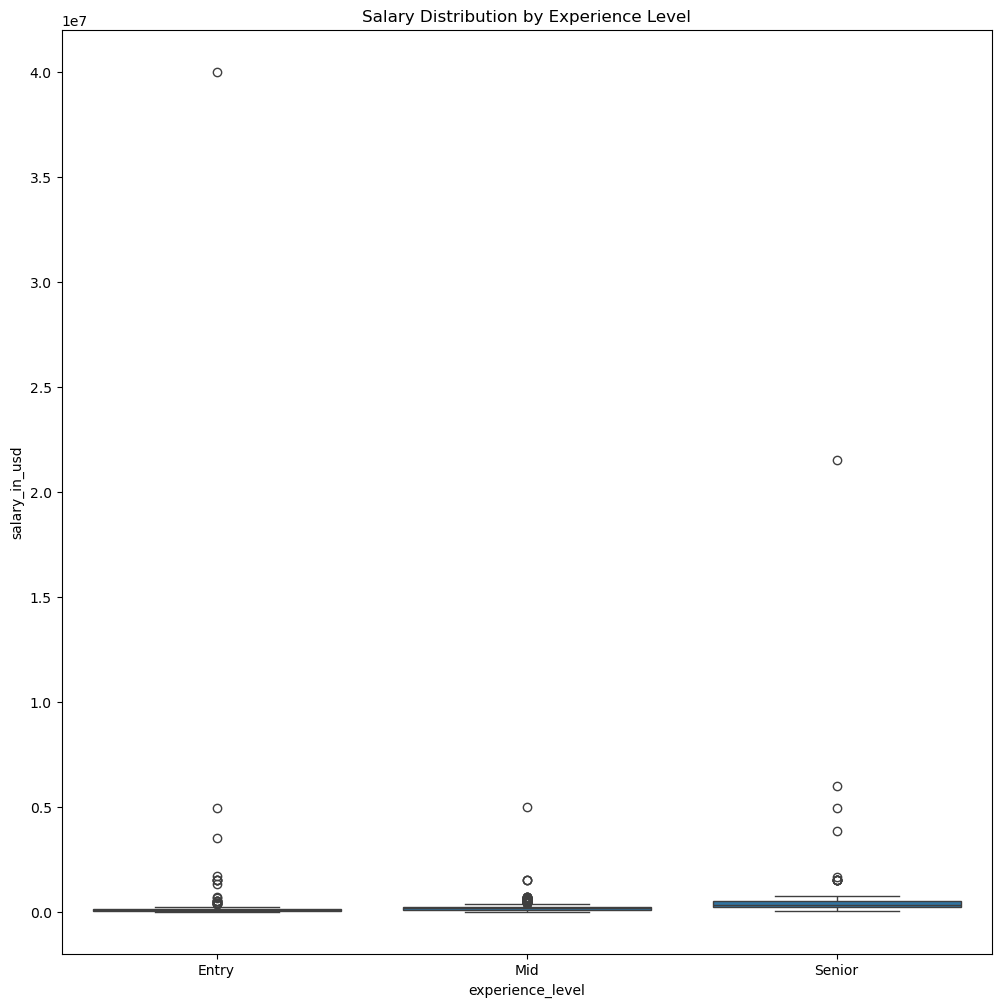

In [76]:
# 6. Visualization (Optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary Distribution by Experience Level")
plt.show()

In [105]:
#F. Mean and median salary for Entry and Mid level positions 
#Filter for a specific list of job titles and then calculate and sort mean salaries for Entry and Mid-level roles

#Top 15 most counted job titles 
df['job_title'].value_counts().head(15)
common_titles = [
    'Machine Learning Engineer',
    'Data Scientist',
    'Junior Data Scientist',
    'Senior Data Scientist',
    'Junior Data Engineer',
    'Senior Data Analyst',
    'Senior Data Architect',
    'Junior Business Analyst',
    'Junior Mlops Engineer',
    'Junior Data Analyst',
    'Data Analyst',
    'Senior Data Engineer',
    'Data Mesh Product Manager',
    'Data Science Consultant',
    'Ai Research Engineer'
]

filtered_df = df[
    (df['job_title'].isin(common_titles)) &
    (df['experience_level'].isin(['Entry', 'Mid']))
]

#Sort by entry level salary
grouped = filtered_df.groupby(['job_title', 'experience_level', ])['salary_in_usd'].mean().unstack()
grouped.sort_values(by='Entry', ascending=False).fillna('Missing')


# Sort by Mid-level salary
grouped_sorted = grouped.sort_values(by='Mid', ascending=False).fillna('Missing')
grouped_sorted



experience_level,Entry,Mid
job_title,,
Machine Learning Engineer,32975.0,352179.0
Data Science Consultant,Missing,145000.0
Data Scientist,1036361.290323,69012.5
Data Analyst,58720.0,Missing
Junior Business Analyst,77314.285714,Missing
Junior Data Analyst,56569.230769,Missing
Junior Data Engineer,81250.0,Missing
Junior Data Scientist,172315.384615,Missing
Junior Mlops Engineer,98576.923077,Missing


## Conclusion

- Senior-level roles have significantly higher pay across most job categories.
- Machine learning domain has the highest potential growth 
- Remote jobs in AI and ML tend to pay more than on-site equivalents.
- Company size appears to correlate with salary, though with overlap.

This project demonstrates how data wrangling techniques like `groupby`, `pivot_table`, and `cut()` can be used to uncover real-world compensation insights from messy global salary data.